In [34]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import statsmodels.api as sm
from scipy import stats
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [35]:
themes = plt.style.available

This case study is based on the MIT [course](https://ocw.mit.edu/courses/mathematics/18-s096-topics-in-mathematics-with-applications-in-finance-fall-2013/case-studies/) Topics in Mathematics with Applications in Finance. 

In [36]:
print(themes)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


# Load the data: 

In [37]:
# rawData = pd.read_csv('rawData.csv')
# load the Clean data
cleanData = pd.read_csv('cleanData.csv').set_index('Date')

In [38]:
# Transform the date index into a datetime object.
cleanData.index = pd.to_datetime(cleanData.index,format='%Y-%m-%d')

In [39]:
cleanData.columns

Index(['DGS3MO', 'DGS1', 'DGS5', 'DGS10', 'DAAA', 'DBAA', 'DCOILWTICO', 'GE',
       'BAC', 'XOM', 'S&P'],
      dtype='object')

In [40]:
fredData = cleanData[['DGS3MO','DGS1','DGS5','DGS10','DAAA','DBAA','DCOILWTICO']]

In [41]:
fredData

DGS3MO  DGS1  DGS5  DGS10  DAAA  DBAA  DCOILWTICO
Date                                                         
2000-01-03    5.48  6.09  6.50   6.58  7.75  8.27         NaN
2000-01-04    5.43  6.00  6.40   6.49  7.69  8.21       25.56
2000-01-05    5.44  6.05  6.51   6.62  7.78  8.29       24.65
2000-01-06    5.41  6.03  6.46   6.57  7.72  8.24       24.79
2000-01-07    5.38  6.00  6.42   6.52  7.69  8.22       24.79
...            ...   ...   ...    ...   ...   ...         ...
2013-05-24    0.04  0.12  0.90   2.01  3.94  4.76       93.84
2013-05-28    0.05  0.13  1.02   2.15  4.06  4.88       94.65
2013-05-29    0.05  0.14  1.02   2.13  4.04  4.88       93.13
2013-05-30    0.04  0.13  1.01   2.13  4.06  4.90       93.57
2013-05-31    0.04  0.14  1.05   2.16  4.09  4.95       91.93

[3373 rows x 7 columns]

In [42]:
stockData = cleanData[ ['GE','BAC', 'XOM', 'S&P']]
stockData

GE        BAC        XOM          S&P
Date                                                    
2000-01-03  26.605433  14.021359  20.760025  1455.219971
2000-01-04  25.541218  13.189125  20.362385  1399.420044
2000-01-05  25.496870  13.333860  21.472454  1402.109985
2000-01-06  25.837751  14.473662  22.582546  1403.449951
2000-01-07  26.838230  14.093729  22.516262  1441.469971
...               ...        ...        ...          ...
2013-05-24  18.647718  11.744439  65.902351  1649.599976
2013-05-28  18.703194  11.842014  66.514366  1660.060059
2013-05-29  18.734898  11.957328  66.298370  1648.359985
2013-05-30  18.703194  12.267793  66.305550  1654.410034
2013-05-31  18.481295  12.116997  65.139130  1630.739990

[3373 rows x 4 columns]

In [43]:
# Compute log daily log Returns ( we remove the first one)
# Marlon: renamed df to conform to naming convention
dailyStockReturns = np.log(stockData).diff()[1:]

In [44]:
dailyStockReturns

GE       BAC       XOM       S&P
Date                                              
2000-01-04 -0.040822 -0.061189 -0.019340 -0.039099
2000-01-05 -0.001738  0.010914  0.053082  0.001920
2000-01-06  0.013281  0.082024  0.050406  0.000955
2000-01-07  0.037991 -0.026601 -0.002940  0.026730
2000-01-10 -0.000413 -0.035275 -0.014079  0.011128
...              ...       ...       ...       ...
2013-05-24 -0.005510  0.002269 -0.002837 -0.000552
2013-05-28  0.002970  0.008274  0.009244  0.006321
2013-05-29  0.001694  0.009691 -0.003253 -0.007073
2013-05-30 -0.001694  0.025633  0.000108  0.003664
2013-05-31 -0.011935 -0.012368 -0.017748 -0.014411

[3372 rows x 4 columns]

In [45]:
# Compute daily return of the risk-free asset 
#     accounting for the number of days between successive closing prices
#     apply annual interest rate using 360 days/year (standard on 360-day yearsince the previous close)
diffDays = np.array([(cleanData['DGS3MO'].index[i+1] - cleanData['DGS3MO'].index[i]
                    ).days for i in range(len(cleanData['DGS3MO'])-1 )])

dailyRiskFree = np.log(1+ 0.01*cleanData['DGS3MO'][1:]*diffDays/360
                      ).rename('Risk free')

In [46]:
dailyRiskFree

Date
2000-01-04    0.000151
2000-01-05    0.000151
2000-01-06    0.000150
2000-01-07    0.000149
2000-01-10    0.000452
                ...   
2013-05-24    0.000001
2013-05-28    0.000006
2013-05-29    0.000001
2013-05-30    0.000001
2013-05-31    0.000001
Name: Risk free, Length: 3372, dtype: float64

In [47]:
dailyGEFree = (dailyStockReturns['GE'] - dailyRiskFree).rename('GE.free')
dailySNPFree = (dailyStockReturns['S&P'] - dailyRiskFree).rename('S&P.free')

In [48]:
pd.concat([dailyStockReturns[['GE','S&P']],
           dailyRiskFree,
           dailyGEFree,
           dailySNPFree],axis=1)

GE       S&P  Risk free   GE.free  S&P.free
Date                                                         
2000-01-04 -0.040822 -0.039099   0.000151 -0.040973 -0.039250
2000-01-05 -0.001738  0.001920   0.000151 -0.001889  0.001769
2000-01-06  0.013281  0.000955   0.000150  0.013131  0.000805
2000-01-07  0.037991  0.026730   0.000149  0.037841  0.026581
2000-01-10 -0.000413  0.011128   0.000452 -0.000865  0.010676
...              ...       ...        ...       ...       ...
2013-05-24 -0.005510 -0.000552   0.000001 -0.005511 -0.000553
2013-05-28  0.002970  0.006321   0.000006  0.002965  0.006315
2013-05-29  0.001694 -0.007073   0.000001  0.001692 -0.007074
2013-05-30 -0.001694  0.003664   0.000001 -0.001695  0.003663
2013-05-31 -0.011935 -0.014411   0.000001 -0.011936 -0.014412

[3372 rows x 5 columns]

In [49]:
dailySNPFree[dailySNPFree<0]

Date
2000-01-04   -0.039250
2000-01-11   -0.013299
2000-01-12   -0.004547
2000-01-18   -0.007473
2000-01-20   -0.007273
                ...   
2013-05-22   -0.008309
2013-05-23   -0.002930
2013-05-24   -0.000553
2013-05-29   -0.007074
2013-05-31   -0.014412
Name: S&P.free, Length: 1597, dtype: float64

In [50]:
# Playing with the sns plot: 

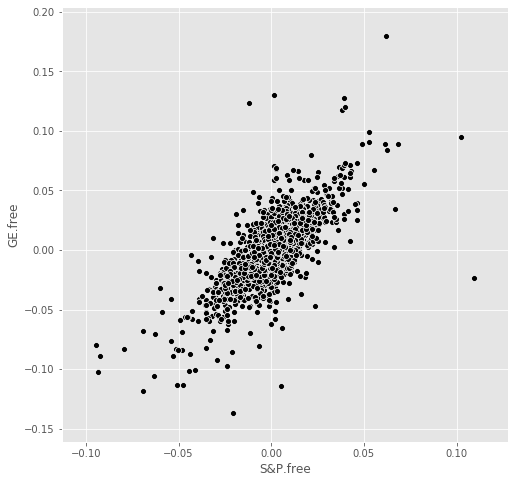

In [51]:
plt.figure(figsize=(8,8))
# Marlon: adding a semi-colon at the end of a plot statement prevents matplotlib from
# printing the object's location in memory. 
sns.scatterplot(y = dailyGEFree,
                x = dailySNPFree,
                color='black'
               );

In [52]:
# Marlon: this seems unnecessary
# plt.figure(figsize=(8,8))
# sns.lineplot(x=GE_daily_free,y= 0.4*GE_daily_free,color='green',label='y=0.4x+1')
# sns.scatterplot(x=GE_daily_free,y=SNP_daily_free,color='black',legend='')
# sns.scatterplot(x = GE_daily_free[GE_daily_free<0],y=SNP_daily_free[SNP_daily_free<0],color='red',label='red')
# sns.scatterplot(x = GE_daily_free[GE_daily_free<0],y=SNP_daily_free[SNP_daily_free>0.1],color='blue',label='blue')

In [53]:
#################################################################################################################################### 
# FITTING A LINEAR REGRESSION USING STATS MODELS ( For Marlon)
###################################################################################################################################

Stats Models [documentations](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html).

# CAPM 
 Sharpe (1964) and Lintner (1965) developed the Capital Asset Pricing Model for a market in which investors have the same expectations, hold portfolios of risky assets that are mean-variance efficient, and can borrow and lend money freely at the same risk-free rate.
 The expected return of asset j is : 

 $$ E[R_j] = R_{riskfree} + \beta_j (E[R_{market}] - R_{riskfree} ) $$  where $$\beta_j   = \frac{Cov(R_j,Risk_{market})}{Var(R_{market})}$$
 
 where $R_{Market}$ is the return on the market portfolio and $R_{riskfree}$ is the return on the risk-free asset. 
 Consider fitting the simple linear regression model of a stock’s daily excess return on the market-portfolio daily excess return, using the S&P 500 Index as the proxy for the market return and the 3-month Treasury constant maturity rate as the risk-free rate. The linear model is given by: 
 
 $$ R^{*}_{j,t}  = \alpha_j + \beta_j R^{*}_{market,t} + \epsilon_{j,t} $$ where $$\epsilon_{j,t}  $$ are gaussian white noise.

 Under the assumptions of the CAPM, the regression parameters $(\alpha_j , \beta_j )$ are such that $\beta_j$ is the same as in the CAPM model, and $\alpha_j$ is zero

In [54]:
# Marlon: fixed incorrect order of x and y
x , y = np.array(dailySNPFree), np.array(dailyGEFree)
x = sm.add_constant(x)

model = sm.OLS(y,x)
results = model.fit()

In [55]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     4432.
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        17:21:44   Log-Likelihood:                 9659.1
No. Observations:                3372   AIC:                        -1.931e+04
Df Residuals:                    3370   BIC:                        -1.930e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.558      0.5

The t-statistic for the intercept is non-significant at a 95% confidence level, so we fail to reject the null hypothesis that $\alpha$ = 0.

### Regression diagnostics

We will diagnose the regression fit based on two measures:
* an analysis of variance (ANOVA), detailing the computation of the F-statistic for no regression structure
* a study of influcence measures, evaluation case influence for the linear regression model;

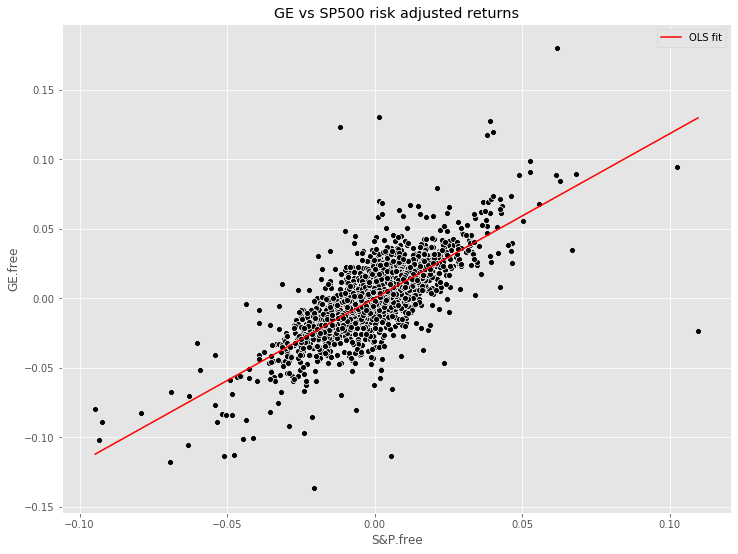

In [56]:
alpha, beta = results.params
plt.figure(figsize = (12,9))
sns.lineplot(x = dailySNPFree,
             y = alpha + beta*dailySNPFree,
             color = 'red',
             label = 'OLS fit'
            )
sns.scatterplot(y = dailyGEFree,
                x = dailySNPFree,
                color='black'
               );
plt.title('GE vs SP500 risk adjusted returns');

In [57]:
##################################################################################################################################################################### RESIDUAL ANALYSIS 
####################################################################################################################################################################


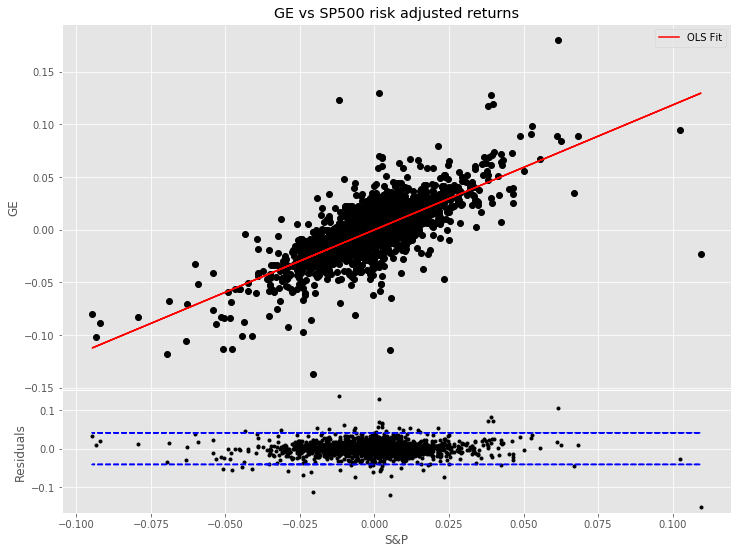

In [58]:
fig, axes = plt.subplots(2,1,sharex=True,gridspec_kw={'height_ratios': [3, 1]},figsize = (12,9))
fig.subplots_adjust(hspace=0)
#---------- First Plot ----------------
axes[0].plot(dailySNPFree,dailyGEFree,'ok'
               )
axes[0].plot( dailySNPFree,
             alpha + beta*dailySNPFree,
             color = 'red',
             label='OLS Fit'
               )

axes[0].set_title('GE vs SP500 risk adjusted returns')
axes[0].set(ylabel='GE')
axes[0].legend()
#---------- Second Plot ----------------
axes[1].plot(   dailySNPFree,
                results.resid,'.k'
               )
axes[1].plot(   dailySNPFree,
                0*dailySNPFree +3*results.resid.std() ,'--b',
               )
axes[1].plot(   dailySNPFree,
                0*dailySNPFree -3*results.resid.std() ,'--b',
               );                  
                                                                      

axes[1].set(ylabel='Residuals')
axes[1].set(xlabel='S&P')
plt.xlabel('S&P')


fig.show()

#### Influence measures

In [67]:
influence = results.get_influence()
influenceDf = influence.summary_frame()
influenceDf.index = dailySNPFree.index
influenceDf

dfb_const    dfb_x1   cooks_d  standard_resid  hat_diag  \
Date                                                                  
2000-01-04   0.006989 -0.020740  0.000240        0.409842  0.002851   
2000-01-05  -0.004810 -0.000655  0.000012       -0.279175  0.000302   
2000-01-06   0.015370  0.000984  0.000119        0.892195  0.000298   
2000-01-07   0.008173  0.016175  0.000164        0.470799  0.001475   
2000-01-10  -0.016752 -0.013413  0.000229       -0.969637  0.000488   
...               ...       ...       ...             ...       ...   
2013-05-24  -0.005895  0.000222  0.000017       -0.342382  0.000297   
2013-05-28  -0.005480 -0.002607  0.000018       -0.317643  0.000364   
2013-05-29   0.012712 -0.006698  0.000104        0.739572  0.000379   
2013-05-30  -0.007372 -0.002047  0.000029       -0.427632  0.000319   
2013-05-31   0.006548 -0.007069  0.000047        0.381696  0.000639   

            dffits_internal  student_resid    dffits  
Date                                                  
2000-01-04         0.021914       0.409792  0.021911  
2000-01-05        -0.004853      -0.279137 -0.004852  
2000-01-06         0.015398       0.892168  0.015398  
2000-01-07         0.018097       0.470745  0.018095  
2000-01-10        -0.021421      -0.969629 -0.021421  
...                     ...            ...       ...  
2013-05-24        -0.005901      -0.342337 -0.005900  
2013-05-28        -0.006061      -0.317600 -0.006060  
2013-05-29         0.014393       0.739522  0.014392  
2013-05-30        -0.007645      -0.427581 -0.007644  
2013-05-31         0.009655       0.381647  0.009654  

[3372 rows x 8 columns]



Let $H = X(X^{T}X)^{-1}X^{T}$ denote the projection matrix of the least squares model. The leverage score for the i-th observation is defined as $h_{i} = H_{ii}$. These elements are listed in the hat_diag column of the influence dataframe. Below we plot their time-series. 

A point is considered high-leveraged if its leverage is above 
$$ \frac{(2p+2)}{n}$$

In [68]:
leverage_threshold = (2*2+2)/len(dailyGEFree)
influenceDf['high leverage'] = (influenceDf['hat_diag']> leverage_threshold)
influenceDf

dfb_const    dfb_x1   cooks_d  standard_resid  hat_diag  \
Date                                                                  
2000-01-04   0.006989 -0.020740  0.000240        0.409842  0.002851   
2000-01-05  -0.004810 -0.000655  0.000012       -0.279175  0.000302   
2000-01-06   0.015370  0.000984  0.000119        0.892195  0.000298   
2000-01-07   0.008173  0.016175  0.000164        0.470799  0.001475   
2000-01-10  -0.016752 -0.013413  0.000229       -0.969637  0.000488   
...               ...       ...       ...             ...       ...   
2013-05-24  -0.005895  0.000222  0.000017       -0.342382  0.000297   
2013-05-28  -0.005480 -0.002607  0.000018       -0.317643  0.000364   
2013-05-29   0.012712 -0.006698  0.000104        0.739572  0.000379   
2013-05-30  -0.007372 -0.002047  0.000029       -0.427632  0.000319   
2013-05-31   0.006548 -0.007069  0.000047        0.381696  0.000639   

            dffits_internal  student_resid    dffits  high leverage  
Date                                                                 
2000-01-04         0.021914       0.409792  0.021911           True  
2000-01-05        -0.004853      -0.279137 -0.004852          False  
2000-01-06         0.015398       0.892168  0.015398          False  
2000-01-07         0.018097       0.470745  0.018095          False  
2000-01-10        -0.021421      -0.969629 -0.021421          False  
...                     ...            ...       ...            ...  
2013-05-24        -0.005901      -0.342337 -0.005900          False  
2013-05-28        -0.006061      -0.317600 -0.006060          False  
2013-05-29         0.014393       0.739522  0.014392          False  
2013-05-30        -0.007645      -0.427581 -0.007644          False  
2013-05-31         0.009655       0.381647  0.009654          False  

[3372 rows x 9 columns]

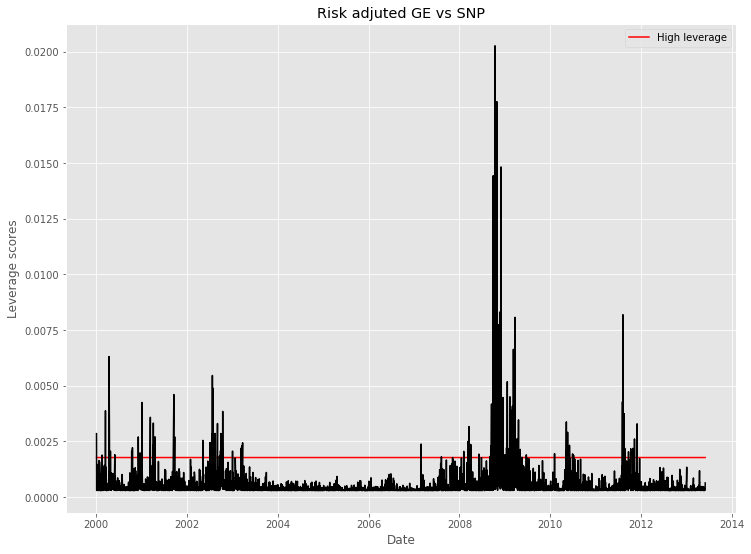

In [239]:
plt.figure(figsize = (12,9))
sns.lineplot(x = dailySNPFree.index,
             y = leverage_threshold,
             color = 'red',
             dashes = True,
             label = 'High leverage'
            )
sns.lineplot(y = influenceDf['hat_diag'],
                x = dailySNPFree.index,
                color = 'black')
plt.title("Risk adjuted GE vs SNP")
plt.ylabel("Leverage scores")
plt.legend();

<a href = "https://en.wikipedia.org/wiki/Cook%27s_distance" target = "_blank"> Cook's distance</a> is a measure of influence accounting for the effect of deleting a given observation. 

Consider a regression model 
$$ y = X\beta + \epsilon,$$
where 
* $y$ is an $n \times 1$ response vector;
* $X$ is an $n \times p$ design matrix;
* $\beta$ is a $p \times 1$ coefficient matrix; 
* $\epsilon$ is a random vector distributed as $\epsilon \sim N(0, \sigma^2 I_n)$.

Let $H = X(X^{T}X)^{-1}X^{T}$ be the projection matrix as above, $\mathbf{y}$ the observed values of a dependent random variable, $\widehat{\mathbf{y}}$ the predicted values, $\widehat{\mathbf{y}} = H\mathbf{y}$, and denote by $\mathbf{e} = (I-H)\mathbf{y}$ the residual vector. We also denote by $\widehat{\mathbf{y}}_{i}$ the fitted response variable when the $i$-th observation is removed from the dataset. Then we define Cook's distance as 
$$D_i = \frac{\| \widehat{\mathbf{y}} - \widehat{\mathbf{y}}_{i}\|^{2}}{p*\mathrm{MSE}},$$
where $\| \cdot \|$ is the l^2 norm, $p$ is the number of coefficients in the regression, and $\mathrm{MSE}$ stands for the mean squared error:
$$ \mathrm{MSE} = \frac{\|e\|^2}{n-p}.$$
We define an observation as influential relative to Cook's distance if its distance is at least the median point of an <a href = "https://en.wikipedia.org/wiki/F-distribution" target = "_blank">$F$-distribution </a> with $(p,n-p)$ degrees of freedom.

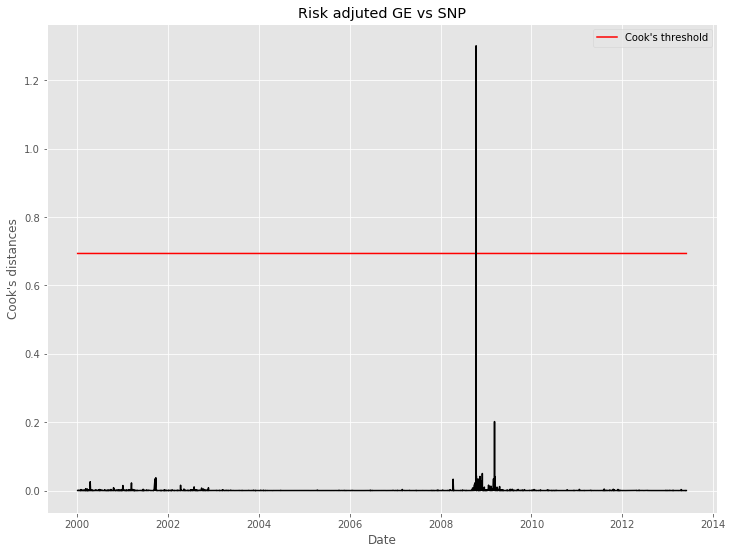

In [240]:
cooks_threshold = stats.f.ppf(0.5, 2, len(dailyGEFree) - 2)
influenceDf['high cooks distance'] = (influenceDf['cooks_d'] > cooks_threshold)
plt.figure(figsize = (12,9))
sns.lineplot(x = dailySNPFree.index,
             y = cooks_threshold,
             color = 'red',
             dashes = True,
             label = "Cook's threshold"
            )
sns.lineplot(y = influenceDf['cooks_d'],
                x = dailySNPFree.index,
                color = 'black');
plt.ylabel("Cook's distances")
plt.title("Risk adjuted GE vs SNP")
plt.legend();

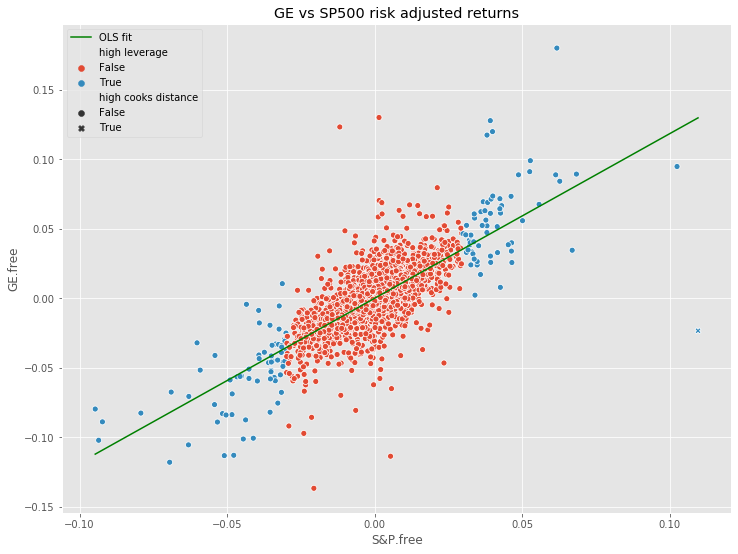

In [241]:
plt.figure(figsize = (12,9))
sns.lineplot(x = dailySNPFree,
             y = alpha + beta*dailySNPFree,
             color = 'green',
             label = 'OLS fit'
            )
sns.scatterplot(y = dailyGEFree,
                x = dailySNPFree,
                hue = influenceDf['high leverage'],
                style = influenceDf['high cooks distance']
               );

plt.title('GE vs SP500 risk adjusted returns');

In [242]:
len(dailyGEFree)

3372

In [243]:
stats.f.ppf(0.5, 2, len(dailyGEFree) - 2)

0.693289767772602

# Residual Analysis ( under construction)

Add: 

- Theoretical background (methtods)
- Create a function that fit and plot a histogram 
- Drawn conclusions 


In [72]:
# Fit a gaussian to the residuals:
_, x_bins = np.histogram(results.resid, bins='fd', density = True)
resid_normParameter = stats.norm.fit(results.resid) 
resid_Fit = stats.norm.pdf(x_bins,*resid_normParameter)

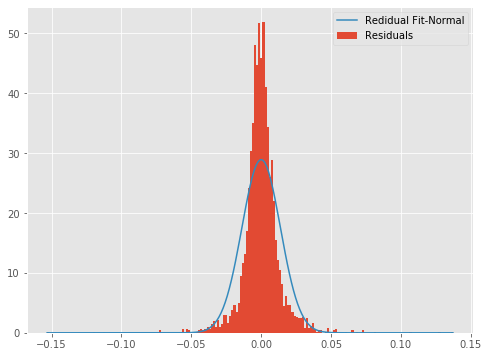

In [73]:
# Plot the historgram of residuals and the PDF for the fitted residuals:
plt.figure(num=None, figsize=(8, 6))
plt.hist(results.resid,bins='fd',density=True,label='Residuals')
plt.plot(x_bins,resid_Fit,label='Redidual Fit-Normal')
plt.legend()

[Text(0.5, 0, 'Leverage')]

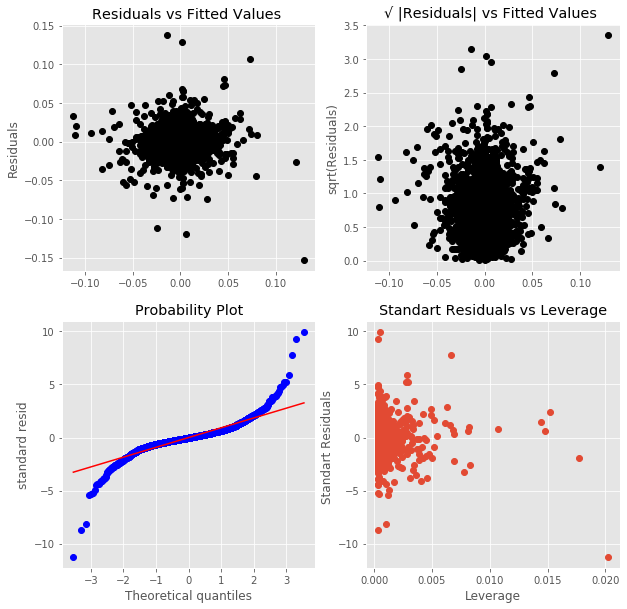

In [74]:
# PLot the 
fig, axes = plt.subplots(2,2,figsize = (10,10) )
# fig.subplots_adjust(hspace=0)
#---------- First Plot ----------------
axes[0,0].plot(results.predict(),results.resid,'ok')
axes[0,0].set_title('Residuals vs Fitted Values ')
axes[0,0].set(ylabel='Residuals')
#---------- Second Plot ----------------
stats.probplot(influenceDf['standard_resid'],
                     dist=stats.norm(*resid_normParameter2),
                     plot= axes[1,0])
axes[1,0].set(ylabel='standard resid')
#---------- Third Plot ----------------
axes[0,1].plot(results.predict(),np.sqrt(np.abs(influenceDf['standard_resid'])),'ok')
axes[0,1].set_title('\u221A |Residuals| vs Fitted Values ')
axes[0,1].set(ylabel='sqrt(Residuals)')

#---------- Fourth Plot ----------------
axes[1,1].plot(influenceDf['hat_diag'],influenceDf['standard_resid'],'o',label='Redidual Fit-Normal')
axes[1,1].set_title('Standart Residuals vs Leverage')
axes[1,1].set(ylabel='Standart Residuals ')
axes[1,1].set(xlabel='Leverage')